In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('salary').getOrCreate()
spark

In [2]:
data = spark.read.csv("C:\\Users\\HAI\\Downloads\\diabetes (1).csv",header = True,inferSchema = True)
data.show(5)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 5 rows



In [3]:
from pyspark.sql.functions import isnan,when,count,col
data.select([count(when(col(c).isNull(),c)).alias(c) for c in data.columns]).show()


+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin|BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+
|          0|      0|            0|            0|      0|  0|                       0|  0|      0|
+-----------+-------+-------------+-------------+-------+---+------------------------+---+-------+



In [4]:
data.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

In [5]:
data.columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [6]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age'],
outputCol='Independent Features')
 
output = assembler.transform(data)
output.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|Independent Features|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+--------------------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|[6.0,148.0,72.0,3...|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|[1.0,85.0,66.0,29...|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|[8.0,183.0,64.0,0...|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|[1.0,89.0,66.0,23...|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|[0.0,137.0,40.0,3...|
|          5|    116|           

In [7]:
finilized_data = output.select('Independent Features','Outcome')
finilized_data.show()

+--------------------+-------+
|Independent Features|Outcome|
+--------------------+-------+
|[6.0,148.0,72.0,3...|      1|
|[1.0,85.0,66.0,29...|      0|
|[8.0,183.0,64.0,0...|      1|
|[1.0,89.0,66.0,23...|      0|
|[0.0,137.0,40.0,3...|      1|
|[5.0,116.0,74.0,0...|      0|
|[3.0,78.0,50.0,32...|      1|
|[10.0,115.0,0.0,0...|      0|
|[2.0,197.0,70.0,4...|      1|
|[8.0,125.0,96.0,0...|      1|
|[4.0,110.0,92.0,0...|      0|
|[10.0,168.0,74.0,...|      1|
|[10.0,139.0,80.0,...|      0|
|[1.0,189.0,60.0,2...|      1|
|[5.0,166.0,72.0,1...|      1|
|[7.0,100.0,0.0,0....|      1|
|[0.0,118.0,84.0,4...|      1|
|[7.0,107.0,74.0,0...|      1|
|[1.0,103.0,30.0,3...|      0|
|[1.0,115.0,70.0,3...|      1|
+--------------------+-------+
only showing top 20 rows



# Logistic Regression

In [20]:
from pyspark.ml.classification import LogisticRegression
train_data,test_data = finilized_data.randomSplit([0.80,0.20])
LR = LogisticRegression(featuresCol = 'Independent Features',labelCol='Outcome')
LR = LR.fit(train_data)

In [21]:
pred_test= LR.transform(test_data)
pred_test.show()


+--------------------+-------+--------------------+--------------------+----------+
|Independent Features|Outcome|       rawPrediction|         probability|prediction|
+--------------------+-------+--------------------+--------------------+----------+
|(8,[1,5,6,7],[99....|      0|[2.04613358128581...|[0.88555635525377...|       0.0|
|[0.0,78.0,88.0,29...|      0|[2.67917350576451...|[0.93578647731956...|       0.0|
|[0.0,95.0,64.0,39...|      0|[1.11037130216901...|[0.75219832716075...|       0.0|
|[0.0,97.0,64.0,36...|      0|[1.57667809759038...|[0.82873354097027...|       0.0|
|[0.0,100.0,70.0,2...|      0|[2.15463023201702...|[0.89610066255342...|       0.0|
|[0.0,100.0,88.0,6...|      0|[0.35581843408847...|[0.58802781931726...|       0.0|
|[0.0,102.0,64.0,4...|      0|[1.07599556947061...|[0.74573543431054...|       0.0|
|[0.0,102.0,75.0,2...|      0|[5.11502486407772...|[0.99403002613601...|       0.0|
|[0.0,102.0,78.0,4...|      0|[2.10489302130397...|[0.89137784572431...|    

In [22]:
pred_test.select('Outcome','prediction').show(10)

+-------+----------+
|Outcome|prediction|
+-------+----------+
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      1|       0.0|
+-------+----------+
only showing top 10 rows



In [23]:
lr_summary = LR.summary

In [24]:
#overall accuracy of classification
lr_summary.accuracy*100

77.65089722675367

In [25]:
#areaUnderROC
print('areaUnderROC:',lr_summary.areaUnderROC*100)

areaUnderROC: 84.56973638369489


In [26]:
#precison of both classes
print('precision:',lr_summary.precisionByLabel)

precision: [0.7931818181818182, 0.7341040462427746]


In [27]:
#recall of both classes
print('recall:',lr_summary.recallByLabel)

recall: [0.8835443037974684, 0.5825688073394495]


In [28]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluater = MulticlassClassificationEvaluator(labelCol = 'Outcome',predictionCol = 'prediction',metricName = 'accuracy')
accuracy_F = evaluater.evaluate(pred_test)
print('accuracy:',accuracy_F*100)

accuracy: 78.70967741935485


In [29]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns

In [30]:
y_true = pred_test.select('Outcome')
y_true = y_true.toPandas()
y_pred = pred_test.select('prediction')
y_pred = y_pred.toPandas()

accuracy_score 78.70967741935485
*********************classification_report******************
              precision    recall  f1-score   support

         0.0       0.90      0.81      0.85       118
         1.0       0.54      0.73      0.62        37

    accuracy                           0.79       155
   macro avg       0.72      0.77      0.74       155
weighted avg       0.82      0.79      0.80       155

*********************confusion_matrix***********************


<AxesSubplot:>

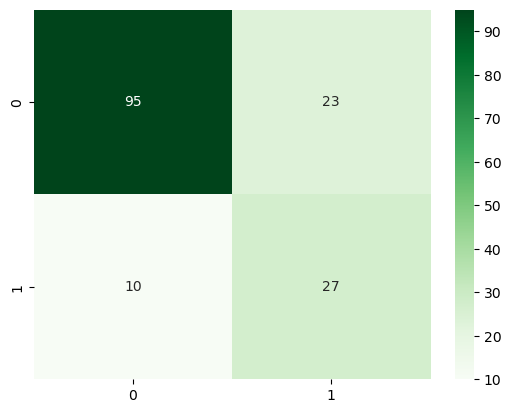

In [31]:
print('accuracy_score',accuracy_score(y_pred,y_true)*100)
print('*********************classification_report******************')
print(classification_report(y_pred,y_true))
print('*********************confusion_matrix***********************')
sns.heatmap(confusion_matrix(y_pred,y_true),annot = True,cmap = 'Greens')